### Block reward functions

This notebook was started optimistically when I was attempting to train agents with block reward. The plots of the reward curves might still be helpful.

In [2]:
import numpy as np
import glob2 as glob
import os
import matplotlib as mpl
import matplotlib.pyplot as plt

AVERAGING_SIZE = 20

In [2]:
def load_data(data_path, averaging_size=AVERAGING_SIZE):
    file_names = glob.glob(data_path)
    data = []
    for file_name in file_names:
        data_for_file = np.load(file_name)
        data.append(data_for_file)
    data = np.concatenate(data, axis=1)
    reduced_data = np.empty((data.shape[0], int(data.shape[1] / averaging_size)))
    for k in range(0, int(data.shape[1] / averaging_size) * averaging_size, averaging_size):
        reduced_data[:, int(k / averaging_size)] = data[:, k:k + averaging_size].mean(axis=1)
    return reduced_data
    

C:\Users\david.bell\AppData\Local\Temp\ipykernel_57792\3795215300.py:23: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  axs[i].scatter(s, reward_func(s, params[0], params[1], high_val=params[2]), c=cmap(i/2))


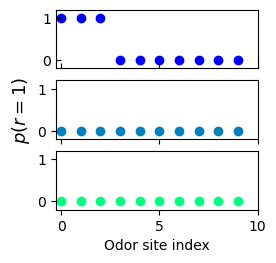

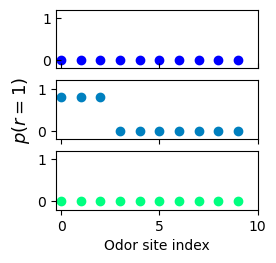

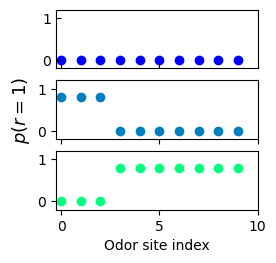

In [86]:
cmap = mpl.colormaps['winter']

def reward_func(x, start, stop, high_val=1):
    return np.where(np.logical_and(x >= start, x < stop), high_val, 0)

a = 0.8

s = np.arange(0, 10)
x = np.linspace(0, 10, 100)

curriculum = [
    [(0, 3, 1), (0, 0, 0), (0, 0, 0)],
    [(0, 0, 0), (0, 3, a), (0, 0, 0)],
    [(0, 0, 0), (0, 3, a), (3, np.inf, a)],
]

for curriculum_stage in curriculum:
    scale = 0.65
    fig, axs = plt.subplots(3, 1, figsize=(4 * scale, 4 * scale), sharex=True, sharey=True)
    axs[0].tick_params(axis='both', direction='in')

    for i, params in enumerate(curriculum_stage):
        axs[i].scatter(s, reward_func(s, params[0], params[1], high_val=params[2]), c=cmap(i/2))

    axs[1].set_ylabel(r'$p(r=1)$', fontsize=13)
    axs[-1].set_xlabel('Odor site index')
    axs[0].set_xlim(-0.25, 10)
    axs[0].set_ylim(-0.2, 1.2)



C:\Users\david.bell\AppData\Local\Temp\ipykernel_57792\1174953711.py:23: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  axs[i].scatter(s, reward_func(s, params[0], params[1], high_val=params[2]), c=cmap(i/2))


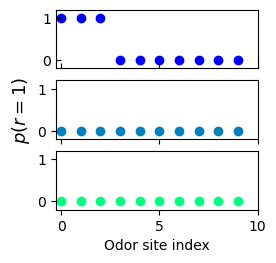

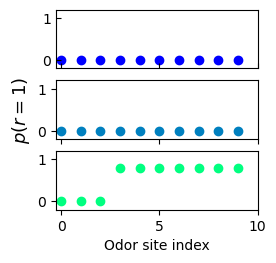

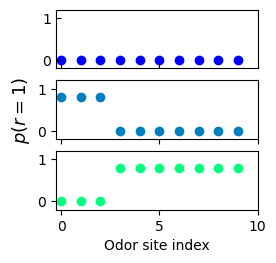

In [85]:
cmap = mpl.colormaps['winter']

def reward_func(x, start, stop, high_val=1):
    return np.where(np.logical_and(x >= start, x < stop), high_val, 0)

a = 0.8

s = np.arange(0, 10)
x = np.linspace(0, 10, 100)

curriculum = [
    [(0, 3, 1), (0, 0, 0), (0, 0, 0)],
    [(0, 0, 0), (0, 0, 0), (3, np.inf, a)],
    [(0, 0, 0), (0, 3, a), (3, np.inf, a)],
]

for curriculum_stage in curriculum:
    scale = 0.65
    fig, axs = plt.subplots(3, 1, figsize=(4 * scale, 4 * scale), sharex=True, sharey=True)
    axs[0].tick_params(axis='both', direction='in')

    for i, params in enumerate(curriculum_stage):
        axs[i].scatter(s, reward_func(s, params[0], params[1], high_val=params[2]), c=cmap(i/2))

    axs[1].set_ylabel(r'$p(r=1)$', fontsize=13)
    axs[-1].set_xlabel('Odor site index')
    axs[0].set_xlim(-0.25, 10)
    axs[0].set_ylim(-0.2, 1.2)